**BANK PERSONAL LOAN MODELING**

***Objective***

 Classify customers if they will accept a personal loan offer based on their dempgraphics and financial health

***Data Preprocessing***

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
#Import dataset
df=pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv",on_bad_lines="skip")

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.shape

(5000, 14)

In [ ]:
#Format column names to lower case
df.columns = [x.lower() for x in df.columns]
df.columns


Index(['id', 'age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

In [ ]:
#Rename column name
df.rename(columns={"zip code":"zip_code","securities account":"securities_account","cd account":"cd_account","personal loan":"personal_loan"},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zip_code            5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We observe that most of the columns are integers. To avoid confusion

*   Convert id,zip_Code,education to object datatype
*   Convert cd_account ,personal_loan,securities_account,online,creditCard to boolean datatype



In [ ]:
#Change data types
df['id']=df['id'].astype(str)
df['zip_code']=df['zip_code'].astype(str)
df['education']=df['education'].astype(str)
df['cd_account']=df['cd_account'].astype(str)
df['personal_loan']=df['personal_loan'].astype(str)
df['creditcard']=df['creditcard'].astype(str)
df['online']=df['online'].astype(str)
df['securities_account']=df['securities_account'].astype(str)

In [ ]:
df.describe()

,age,experience,income,family,ccavg,mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.147663,1.747659,101.713802
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000


***EDA (Exploratory Data Analysis)***

**What are we trying to answer?**

*Uni- variate Analysis*

*   Age distribution
*   Annual Income distribution
*   Education Level

*Bi- variate Analysis*

*   Mortgage Vs Personal Loan
*   ccavg Vs Personal Loan
*   Securities account,cd account,personal loan
*   zip code vs personal loan








**Uni-variate Analysis**

In [ ]:
#Age distribution
custom_bins=[20,30,20,50,60,70]

[Text(20, 0, '20-29'),
 Text(30, 0, '30-39'),
 Text(20, 0, '20-29'),
 Text(50, 0, '50-59'),
 Text(60, 0, '60-69'),
 Text(70, 0, '70+')]

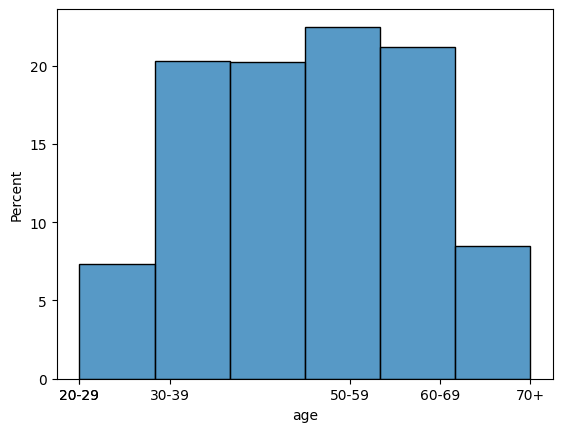

In [ ]:
ax = sns.histplot(data=df,x="age",binwidth=8,bins=custom_bins,stat="percent",binrange=(20, 70))
ax.set_xticks(custom_bins)
ax.set_xticklabels([f'{bin}-{bin+9}' for bin in custom_bins[:-1]] + [f'{custom_bins[-1]}+'])

<Axes: xlabel='income'>

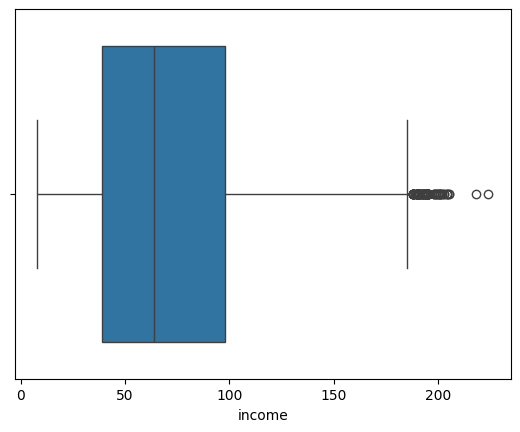

In [ ]:
sns.boxplot(data=df,x="income")

<Axes: xlabel='income', ylabel='Percent'>

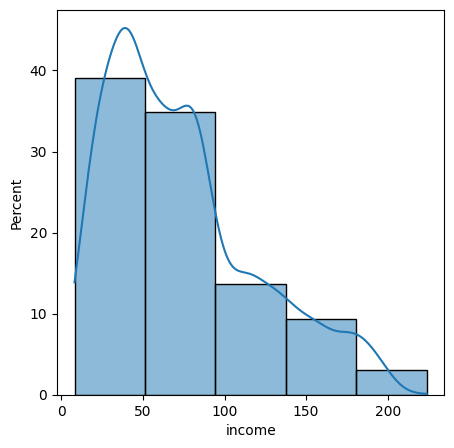

In [ ]:
#Income Distribution
plt.figure(figsize=(5,5))
sns.histplot(data=df,x="income",bins=5,stat="percent",kde=True)


<Axes: xlabel='education', ylabel='count'>

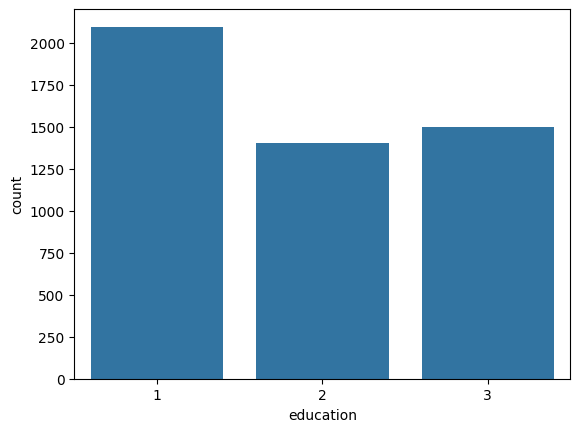

In [ ]:
sns.countplot(data=df,x="education")

**Bi- Variate Analysis**

In [ ]:
#Average Mortgage value of customers who accepted personal loan in last campaign
x=df.groupby(["personal_loan"])["mortgage"].mean()

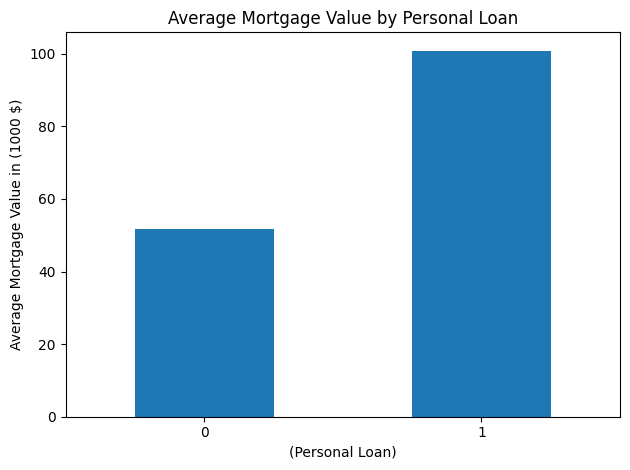

In [ ]:
# Plot the average mortgage value by personal loan and creditcard
x.plot(kind='bar')
plt.title('Average Mortgage Value by Personal Loan')
plt.xlabel('(Personal Loan)')
plt.ylabel('Average Mortgage Value in (1000 $)')
plt.xticks(rotation=0) # Rotate x-axis labels if needed
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
#Average Income of customers who accepted personal loan in last campaign
x=df.groupby(["personal_loan"])["income"].mean()

Text(0, 0.5, 'Average Income')

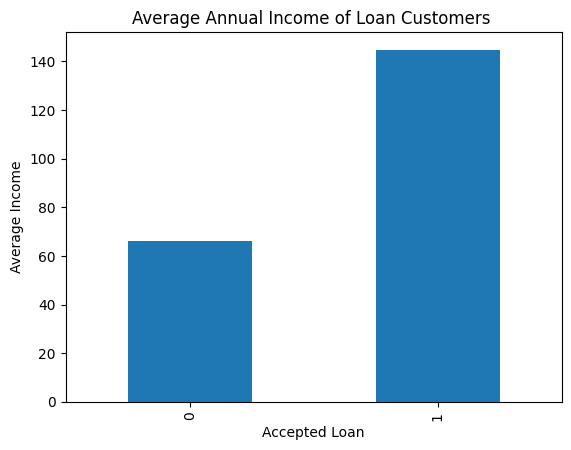

In [ ]:
x.plot(kind="bar")
plt.title("Average Annual Income of Loan Customers ")
plt.xlabel("Accepted Loan")
plt.ylabel("Average Income")

<Axes: xlabel='age_group', ylabel='count'>

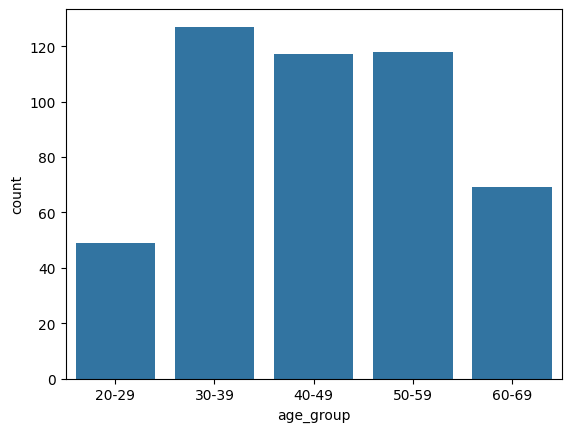

In [ ]:
#Loan acceptors by age group
age_bins = range(20, 71, 10)
age_labels=[f'{i}-{i+9}' for i in age_bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
loan_accepters=df[df["personal_loan"]=='1']
loan_accepters['age_group'].value_counts().sort_values(ascending=False)
sns.countplot(data=loan_accepters,x="age_group")

/tmp/ipython-input-3918027835.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = loan_accepters.groupby('age_group')['mortgage'].mean().reset_index()


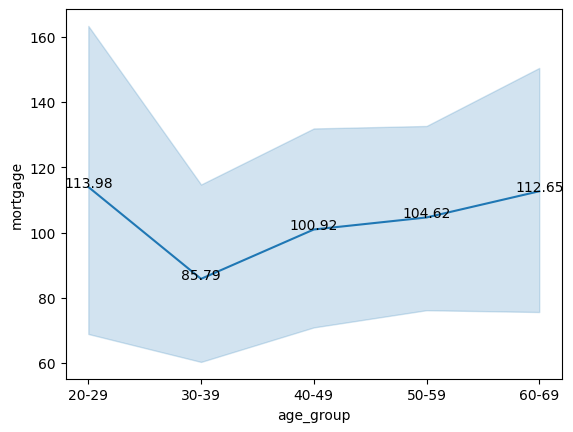

In [ ]:
ax = sns.lineplot(data=loan_accepters,x="age_group",y="mortgage")

# Get the data for the plot
plot_data = loan_accepters.groupby('age_group')['mortgage'].mean().reset_index()

# Add labels to the points
for i, row in plot_data.iterrows():
    ax.text(row['age_group'], row['mortgage'], round(row['mortgage'], 2), color='black', ha="center")

plt.show()

**Feature Engineering/Feature Selection**